#### Quantum Cryptography -Day2
# Superposition and Shannon Entrophy
This note notebook intorsuction  to qunatum superposition and working of shannon entrophy,in this notebook we will learn:
- What is **Quantum Superposition** is and how it differs from classical states
- How to prepare the **|+>(plus) state** using qunatum circuit
- How quantum **measurement depend on  repeated shots**
- How to compute **probability distribution** from measurement result
- what **Shannon Entrophy** is and why it matters in cryptography.
- How entrophy change with **numbers of measurement(shots)**

## Introduction of Quantum Superposition
-In classical computing bit is either 0  **or** 1.
- In quantum computing Qubit is $|\psi>=|\alpha> + |\beta> $
    where $\alpha$ and $\beta$  are complex amplitudes and $|\alpha|^2 +|\beta|^2 =1$

### The state |+>  
this is the most important superposition states is the **plus state**:
$$
|+> =\frac{|0>+|1>}{\sqrt{2}}
$$
This states produces **equal probability** of measuring '0' or '1',making it ideal fro studying randomness and entrophy in quantum cryptography

## Introduction to Shannon Entrophy
- **Why Entrophy Matters in Cryptography**
Entrophy measures **uncertainty or randomness** in information.

- In Cryptography:
    - Highr Entrophy $\rightarrow$ more secure keys
    - Lower Entrophy $\rightarrow$ predicatble ,insecure systems

### Shannon Entrophy formula
$$
H = -\sum_i P_i \log_2(P_i)
$$
where:
- $P_i$ is the probability of outcome 'i'

for perfect quantum |+> state:
- P(0)=0.5
- P(1)=0.5
- Entrophy = **1 bit(maximum for 1 qubit)**

## Import requires Libraries

In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import numpy as np
import matplotlib.pyplot as plt

## Preparing the |+> States
- **What we Do**
    - Start with a qubit in the default |0> state
    - Apply a **Hadamard(H) gate**
- **Why we Do this**
    -The hadamard gate creates equal superpoition
    - This essential for studying  quantum randomness
- **Effect**
    - Measurement outcomes become probabilistic instead of deterministic

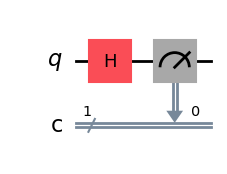

In [2]:
qc=QuantumCircuit(1,1)
qc.h(0)
qc.measure(0,0)
qc.draw('mpl')

## Repeated Measurement (Shots)
now we run the circuit in multiple times and collect the measurment results because the quantum mechanic  gives probabilities , not single outcomes and more shots gives better approximation of true probabilities. 

Due to this we get effect as small shot counts shoe fluctuations ad large shot counts converge to 50-50  distribution.

In [3]:
sim=AerSimulator()
shots=1024
job=sim.run(qc,shot=shots)
result=job.result()
counts=result.get_counts()
counts

{'1': 514, '0': 510}

## Computing Probability Distribution
 now we convert the raw  count into probabilities  because shannon entrophy required  probabilities due to this we quantitatively analyze randomness.

In [4]:
probabilities={state:count/shots for state ,count in counts.items()}
probabilities

{'1': 0.501953125, '0': 0.498046875}

## Calculating Shannon Entrophy
now we Apply the Shannon entrophy from using numpy  to quantify information randomness value close to 1 indicate maximum randomness

In [7]:
def shannon_entrophy(probs):
    return -sum(p * np.log2(p) for p in probs if p > 0)
entrophy=shannon_entrophy(probabilities.values())
entrophy

np.float64(0.9999889930823526)

## Entrophy vs Number of shots
- Repeat the experiment for increasing shot counts to observe convergence toward theoritical entrophy .
- we get entrophy stabilize near to 1 shots increase.

In [9]:
shot_list=[10,50,100,500,1000,5000]
entrophy_values=[]
for s in shot_list:
    job=sim.run(qc,shots=s)
    result=job.result()
    counts=result.get_counts()
    probs=[count/s for count in counts.values()]
    entrophy_values.append(shannon_entrophy(probs))
entrophy_values

[np.float64(1.0),
 np.float64(0.9248187049730301),
 np.float64(0.9858150371789198),
 np.float64(1.0),
 np.float64(0.9989581233509567),
 np.float64(0.9998504162082946)]

## Plotting Entrophy vs Shots

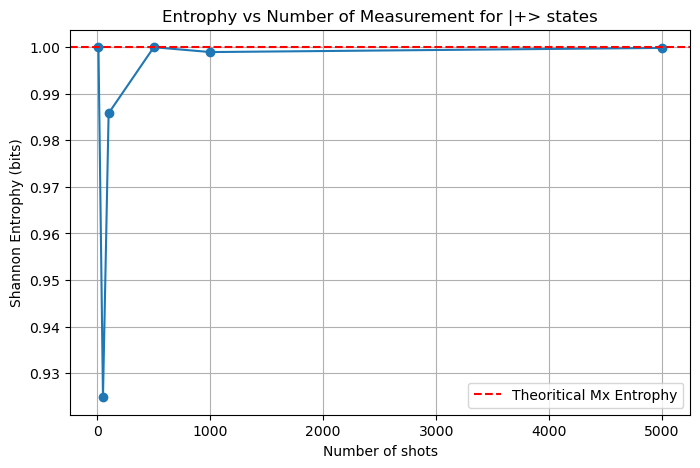

In [11]:
plt.figure(figsize=(8,5))
plt.plot(shot_list,entrophy_values,marker='o')
plt.axhline(1,linestyle='--' , color='red' , label='Theoritical Mx Entrophy')
plt.xlabel('Number of shots')
plt.ylabel('Shannon Entrophy (bits)')
plt.title('Entrophy vs Number of Measurement for |+> states')
plt.legend()
plt.grid(True)
plt.show()

prediction of above graph, 
- for 0-50 get entrophy behaviour fluctuates (often < 1) 
- for 100-500 it approches to 1 
- for 1000+ it stabilize near to 1 

means we get high radomness and 

**high randomness=secure quantum Key**.

## Key Takeway
- The |+> state represents **maximum superposition** for one qubit
- Measurement utcomes are inherently **probabilistic**
- Shannon Entrophy quantifies **quantum randomness**
- Increasing shots improves probability estimation
- this concept is fondational for **Quantum Key Distribution(QKD)**

---

**Author** : Shreya Palase

**Repository**: Quantum-Cryptography(codeQubit)

**file** : day02_superposition_and_ShannonEntrophy.ipynb

**Date created**: 21-Janaury-2026

<sub>© Shreya Palase- All Rights Reserved.This notbook is part of a structured learning series designed for Github publication.</sub>